___

### **<center><span style="color:orange">M1 Géoénergie - Parcours G3</span><center>**

## **<center><span style="color:red">Mini-projet (CC1)</span><center>**

### **<center><span style="color:red">Outils numériques pour les Géosciences<center></span>**

##### **<center>BESSE MATTEO<center>**

##### <center>2025-2026<center>

___

**Exercice 1 :**

 *Chargez le fichier ‘sismique.txt'. Ce fichier contient les amplitudes d’une trace sismique. Ces amplitudes sont mesurées en microvolts. Le pas d’échantillonnage en temps est de 2 millisecondes.*

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
amp = np.loadtxt("sismique.txt")
print(amp.shape) # Pour voir si le fichier est bien chargé en sa totalité : retourne (3100) et il y a bien 3100 lignes donc c'est bon.
print(amp[:10]) # Permet d'avoir un aperçu des données (ici les 10 premières valeurs).

(3100,)
[ -15199.742 -232157.06  -203495.44  -186220.31  -179234.81  -179960.44
 -167908.38  -133589.88   -85412.438  -53325.57 ]


*Représentez l’amplitude de la trace sismique en volts en fonction du temps en millisecondes.*

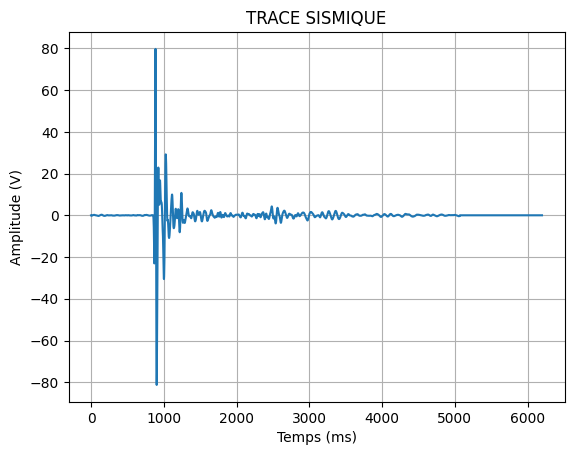

In [5]:
# Conversions : 

amp_V = amp * 10**-6 # microvolts en volts
dt = 2 # pas d'échantilonnage en ms

# Vecteur temps (t) :

N = len(amp_V)
t = np.arange(0, N * dt, dt)

# Représentation graphique :

plt.plot(t, amp_V) # Représenter l'amplitude en fonction du temps (t en abscisse, amp en ordonnée)
plt.title("TRACE SISMIQUE") # Titre graphique
plt.xlabel("Temps (ms)") # Nom axe des abscisses
plt.ylabel("Amplitude (V)") # Nom axe des ordonnées
plt.grid(True) # Quadrillage
plt.show()

*Représentez à nouveau l’amplitude de la trace sismique en fonction du temps sur une fenêtre de temps allant de 800 à 1200 ms.*

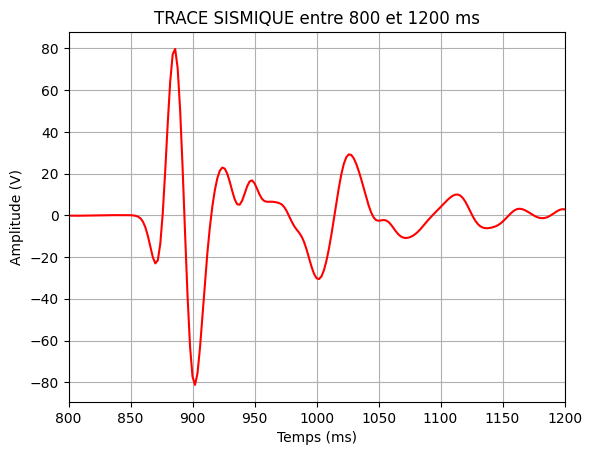

In [6]:
plt.plot(t, amp_V, "red")
plt.title("TRACE SISMIQUE entre 800 et 1200 ms")
plt.xlabel("Temps (ms)")
plt.ylabel("Amplitude (V)")
plt.xlim(800,1200) # Même procédé que précemment mais ajout d'un intervalle allant de 800 à 1200 ms. 
plt.grid(True)
plt.show()

*Quelles sont les amplitudes minimale et maximale du signal ? Pour quelles valeurs de temps ces amplitudes sont-elles atteintes ? La valeur absolue de la différence entre ces deux temps vous donne la demi-période du signal. A partir de cette demi-période, calculez la période et la fréquence du signal.*

In [36]:
amp_min = np.min(amp_V) # Amplitude minimale
print("L'amplitude minimale du signal est d'environ", round(amp_min, 2), "V")

amp_max = np.max(amp_V) # Amplitude maximale
print("L'amplitude maximale du signal est d'environ", round(amp_max, 2), "V")

t_min = t[np.argmin(amp_V)] # temps amplitude minimale
print("L'amplitude minimale est atteinte à", t_min, "ms")

t_max = t[np.argmax(amp_V)] # temps amplitude maximale
print("L'amplitude maximale est atteinte à", t_max, "ms")



L'amplitude minimale du signal est d'environ -81.28 V
L'amplitude maximale du signal est d'environ 79.72 V
L'amplitude minimale est atteinte à 902 ms
L'amplitude maximale est atteinte à 886 ms


In [39]:
demi_periode = abs(t_min-t_max)

periode = demi_periode*2
print("La période du signal est de", periode, "ms")

frequence = 1/periode*(10**3) # Frequence en Hz
print("La fréquence du signal est de", frequence, "Hz")

La période du signal est de 32 ms
La fréquence du signal est de 31.25 Hz


___

**Exercice 2 :**

*Créer une boucle qui permette de trouver un bateau caché dans une grille de 5 par 5.*  
***Consignes :***  
*- Si le joueur donne un numéro de ligne et de colonne en dehors de la grille, alors il
reçoit un message d’erreur*  
*- Le joueur a 10 coups pour trouver le bateau, sinon il perd*  
*- Lorsque le joueur tire dans l’eau on affiche « A l’eau ! », lorsqu’il touche le bateau,
on affiche « Coulé ! »*  

In [ ]:
import random

#Placement aléatoire d'un bateau dans une grille de 5 par 5
bateau_ligne = random.randint(1,5)
bateau_colonne = random.randint(1,5)

essais_restants = 10

while essais_restants>0:
    ligne = int(input("Choisir une ligne (entre 1 et 5)"))
    colonne = int(input("Choisir une colonne (entre 1 et 5)"))
    if ligne < 1 or ligne > 5 or colonne < 1 or colonne > 5:
        print("Saisie non valide, choisir une valeur dans la grille (entre 1 et 5)")
        continue
    
    if ligne == bateau_ligne and colonne == bateau_colonne:
        print("Coulé ! Vous avez gagné en", 11-essais_restants, "essais")
        break
    
    else :
        print("A l'eau ! Choisir à nouveau")
        
    essais_restants = essais_restants - 1

    if essais_restants == 0:
        print("Dommage, vous avez perdu ! Le bateau était en (",bateau_ligne,";",bateau_colonne,")")

A l'eau ! Choisir à nouveau
A l'eau ! Choisir à nouveau
A l'eau ! Choisir à nouveau
Saisie non valide, choisir une valeur dans la grille (entre 1 et 5)
A l'eau ! Choisir à nouveau
A l'eau ! Choisir à nouveau
A l'eau ! Choisir à nouveau
A l'eau ! Choisir à nouveau
A l'eau ! Choisir à nouveau
A l'eau ! Choisir à nouveau
A l'eau ! Choisir à nouveau
Dommage, vous avez perdu ! Le bateau était en ( 3 ; 3 )
